In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
# TASK 1
# a)

def tanh(x):
    ''' It returns the value (1-exp(-2x))/(1+exp(-2x)) and the value returned will be lies in between -1 to 1.'''
    return np.tanh(x)

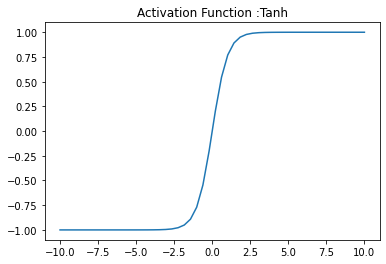

In [4]:
x = np.linspace(-10, 10)
plt.plot(x, tanh(x))
plt.axis('tight')
plt.title('Activation Function :Tanh')
plt.show()

In [5]:
# b)

def sigmoid(x):
    ''' It returns 1/(1+exp(-x)). where the values lies between zero and one '''
    return 1/(1+np.exp(-x))

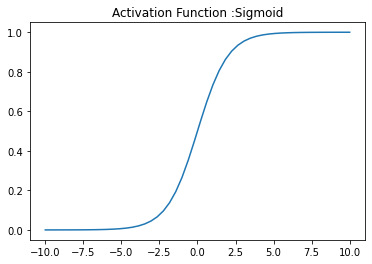

In [6]:
x = np.linspace(-10,10)
plt.plot(x, sigmoid(x))
plt.title('Activation Function :Sigmoid')
# plt.axis('tight')
plt.show()

In [7]:
# c)

def softmax(x):
    ''' Compute softmax values for each sets of scores in x. 
    Softmax turns logits, the numeric output of the last linear layer 
    of a multi-class classification neural network into probabilities.'''
    return np.exp(x) / np.sum(np.exp(x), axis=0)

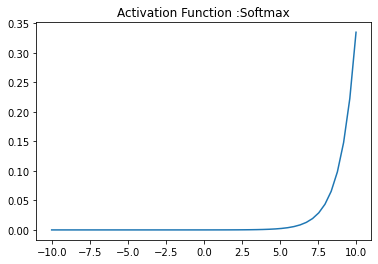

In [8]:
x = np.linspace(-10,10)
plt.plot(x, softmax(x))
plt.title('Activation Function :Softmax')
plt.show()

In [9]:
# d)

def custom_activation(x):
  return(3*x**2+5)

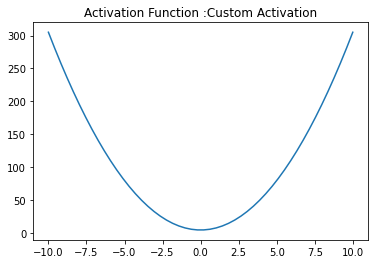

In [10]:
x = np.linspace(-10,10)
plt.plot(x, custom_activation(x))
plt.title('Activation Function :Custom Activation')
plt.show()

In [14]:
# TASK 2
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
x

array([-15.        , -14.76744186, -14.53488372, -14.30232558,
       -14.06976744, -13.8372093 , -13.60465116, -13.37209302,
       -13.13953488, -12.90697674, -12.6744186 , -12.44186047,
       -12.20930233, -11.97674419, -11.74418605, -11.51162791,
       -11.27906977, -11.04651163, -10.81395349, -10.58139535,
       -10.34883721, -10.11627907,  -9.88372093,  -9.65116279,
        -9.41860465,  -9.18604651,  -8.95348837,  -8.72093023,
        -8.48837209,  -8.25581395,  -8.02325581,  -7.79069767,
        -7.55813953,  -7.3255814 ,  -7.09302326,  -6.86046512,
        -6.62790698,  -6.39534884,  -6.1627907 ,  -5.93023256,
        -5.69767442,  -5.46511628,  -5.23255814,  -5.        ,
        -4.76744186,  -4.53488372,  -4.30232558,  -4.06976744,
        -3.8372093 ,  -3.60465116,  -3.37209302,  -3.13953488,
        -2.90697674,  -2.6744186 ,  -2.44186047,  -2.20930233,
        -1.97674419,  -1.74418605,  -1.51162791,  -1.27906977,
        -1.04651163,  -0.81395349,  -0.58139535,  -0.34

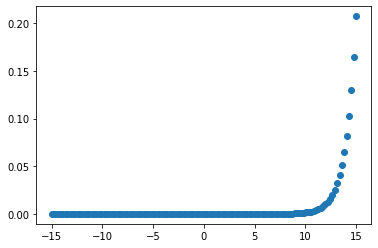

In [15]:
y = softmax(x)
train_data =x.reshape(num_points, 1)
label = y.reshape(num_points, 1)

plt.scatter(train_data, label)
plt.show()

In [17]:
!pip install neurolab

     |████████████████████████████████| 645 kB 7.7 MB/s 
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22180 sha256=6c34fee44c051c3e2d60a3e212659a07e0984c2b2c48401e7ad46627859532b5
  Stored in directory: /root/.cache/pip/wheels/3e/07/63/e3d6e066089d7186465184a6f9a1884471485f38beef1edeaa
Successfully built neurolab


In [23]:
import neurolab as nl

nn = nl.net.newff([[min_val,max_val]],[10,6,1])

nn.trainf = nl.train.train_gd

error_progress = nn.train(train_data, label, epochs=2000, show=100, goal=0.01)

output = nn.sim(train_data)
y_pred = output.reshape(num_points)

Epoch: 100; Error: 0.11046297099013948;
Epoch: 200; Error: 0.014558935681451538;
The goal of learning is reached


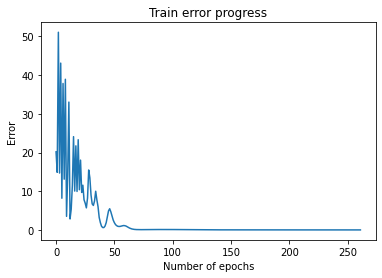

In [24]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Train error progress')
plt.show()

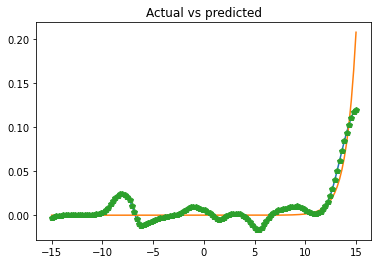

In [25]:
# Plot input data

x_dense = np.linspace(min_val, max_val, num_points*2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-',x,y, '-', x, y_pred, 'p')
plt.title('Actual vs predicted')
plt.show()

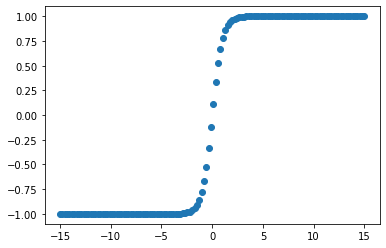

In [26]:
# For tanh
y = tanh(x)
train_data =x.reshape(num_points, 1)
label = y.reshape(num_points, 1)

plt.scatter(train_data, label)
plt.show()

In [27]:
nn = nl.net.newff([[min_val,max_val]],[10,6,1])

nn.trainf = nl.train.train_gd

error_progress = nn.train(train_data, label, epochs=2000, show=100, goal=0.01)

output = nn.sim(train_data)
y_pred = output.reshape(num_points)

Epoch: 100; Error: 0.03891871847238514;
Epoch: 200; Error: 0.01933650729267685;
Epoch: 300; Error: 0.013760982473952542;
Epoch: 400; Error: 0.011185613958250212;
The goal of learning is reached


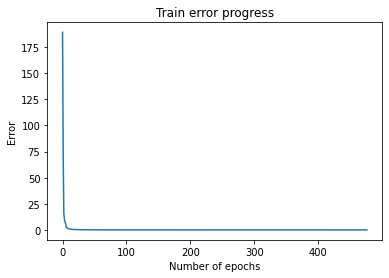

In [28]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Train error progress')
plt.show()

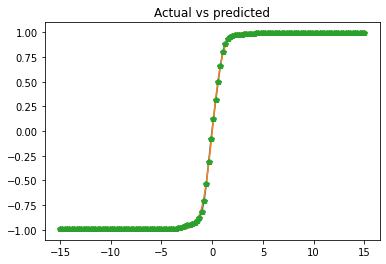

In [29]:
# Plot input data

x_dense = np.linspace(min_val, max_val, num_points*2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-',x,y, '-', x, y_pred, 'p')
plt.title('Actual vs predicted')
plt.show()